# Category Experiment Analysis
20 subjects scanned, 2 removed.

In [1]:
disp(datestr(datetime))

27-Sep-2018 15:51:36


In [2]:
% voxel data
    load('/Users/aidasaglinskas/Desktop/detrend_voxel_data.mat')
%load('/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/voxel_data_allvC.mat');
% ROI data
    load('/Users/aidasaglinskas/Desktop/detrend_roi_data.mat')
    %load('/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/roi_data_allVc.mat');
roi_raw = roi_data;
% tlbls
load('/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/Scripts/tlbls.mat');
tlbls_raw = tlbls;
% wiki Model
load('/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/Scripts/mats/wikiClust.mat')
% combData;
%comb = load('/Users/aidasaglinskas/Desktop/comb_voxel_data.mat');
comb = load('/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/voxel_data_comb.mat');
comb = comb.voxel_data;
%
%model = wikiClust.cmat; model(5,:) = [];model(:,5) = [];
wikiClust.cmat;wikiClust.cmat(:,5) = [];wikiClust.cmat(5,:) = [];wikiClust.lbls(5) = [];
%model = wikiClust;
roi_data.leg = 'ROI|CONDS|SUBS';
rlbls = voxel_data.mat_files; 

roi_data.tlbls = tlbls;
roi_data.rlbls = rlbls;


warning('off','stats:linkage:NotEuclideanMatrix')
disp('loaded and ready')

loaded and ready


In [3]:
%% restrict tasks 
bool_restrict_tasks = 1;
if bool_restrict_tasks
    t_drop = [5];
roi_data.mat(:,t_drop,:)= [];
voxel_data.dt(:,t_drop,:) = [];
comb.dt(:,t_drop,:) = [];
tlbls(t_drop) = [];
end

In [4]:
%% Subtract CC
bool_subCC = 1;
if bool_subCC
roi_data.mat = roi_data.mat - roi_data.mat(:,end,:);

for r = 1:size(voxel_data.dt,1);
for c = 1:size(voxel_data.dt,2);
for s = 1:size(voxel_data.dt,3);
voxel_data.dt{r,c,s} = voxel_data.dt{r,c,s}-voxel_data.dt{r,end,s};
%voxel_data.dt{r,c,s} = zscore(voxel_data.dt{r,c,s});
end
end
end

for r = 1:size(comb.dt,1);
for c = 1:size(comb.dt,2);
for s = 1:size(comb.dt,3);
comb.dt{r,c,s} = comb.dt{r,c,s} - comb.dt{r,end,s};
comb.dt{r,c,s} = zscore(comb.dt{r,c,s});
end
end
end
roi_data.mat(:,17,:) = [];
voxel_data.dt(:,17,:) = [];
comb.dt(:,17,:) = [];
tlbls(17) = [];
end

In [5]:
%% Retrict ROIs
bool_rois = 0;
if bool_rois
wh_rois = ~ismember(1:length(rlbls),[1 2 3 6]);
rlbls_leg = arrayfun(@(x) [num2str(x,'%.2i') ' : ' rlbls{x}],1:length(rlbls),'UniformOutput',0)';
roi_data.mat = roi_data.mat(wh_rois,:,:);
voxel_data.dt = voxel_data.dt(wh_rois,:,:);
rlbls = rlbls(wh_rois);
end

In [6]:
t_ord = [10 11 7 8 9 14 12 13 1 3 4 5 16 6 15 2];
%r_ord = [8 9 5 6 7 12 1 2 10 11 3 4];
r_ord = 1:size(roi_data.mat,1);
roi_data.tlbls = tlbls';
%reorder

roi_data.mat = roi_data.mat(r_ord,t_ord,:);
roi_data.tlbls = roi_data.tlbls(t_ord);
roi_data.rlbls = roi_data.rlbls(r_ord);

comb.dt = comb.dt(:,t_ord,:);
comb.tlbls = roi_data.tlbls;


voxel_data.mat_files = voxel_data.mat_files(r_ord);
voxel_data.dt = voxel_data.dt(r_ord,t_ord,:);
voxel_data.tlbls = roi_data.tlbls;

wikiClust.cmat = wikiClust.cmat(t_ord,t_ord);
wikiClust.lbls = wikiClust.lbls(t_ord);

voxel_data
comb
roi_data


voxel_data = 

  struct with fields:

    mat_files: {12x1 cell}
           dt: {12x16x18 cell}
        tlbls: {16x1 cell}


comb = 

  struct with fields:

    mat_files: {'Combined_ROIs'}
           dt: {1x16x18 cell}
        tlbls: {16x1 cell}


roi_data = 

  struct with fields:

      mat: [12x16x18 double]
     lbls: {12x1 cell}
      leg: 'ROI|CONDS|SUBS'
    tlbls: {16x1 cell}
    rlbls: {12x1 cell}




nrois =

    12



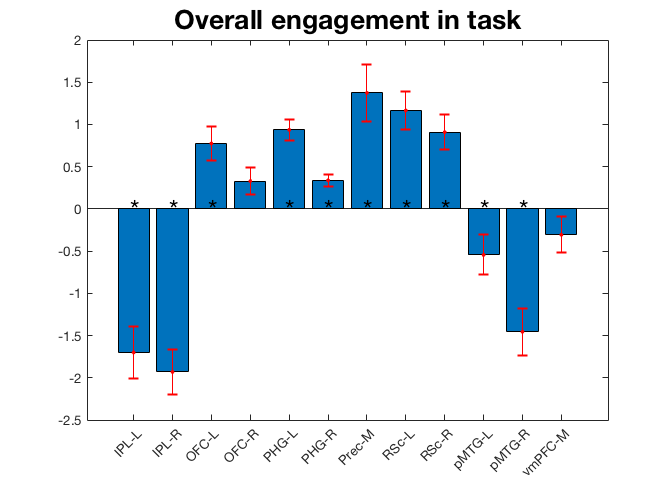

In [7]:
%plot --size 700,500

mm = squeeze(mean(roi_data.mat,2));
m = mean(mm,2);
se = std(mm,[],2) ./ sqrt(size(roi_data.mat,3));

[H,P,CI,STATS] = ttest(mm',0,'alpha',.05);
significant_inds = find(H);


h = bar(m);hold on;
e = errorbar(m,se,'r.');hold on;
xticklabels(roi_data.rlbls);
xtickangle(45);

nrois = size(roi_data.mat,1)
for i = 1:nrois
    if H(i)
text(i-.1,0,'*','fontsize',20);
    end
end

title('Overall engagement in task','FontSize',20)
hold off

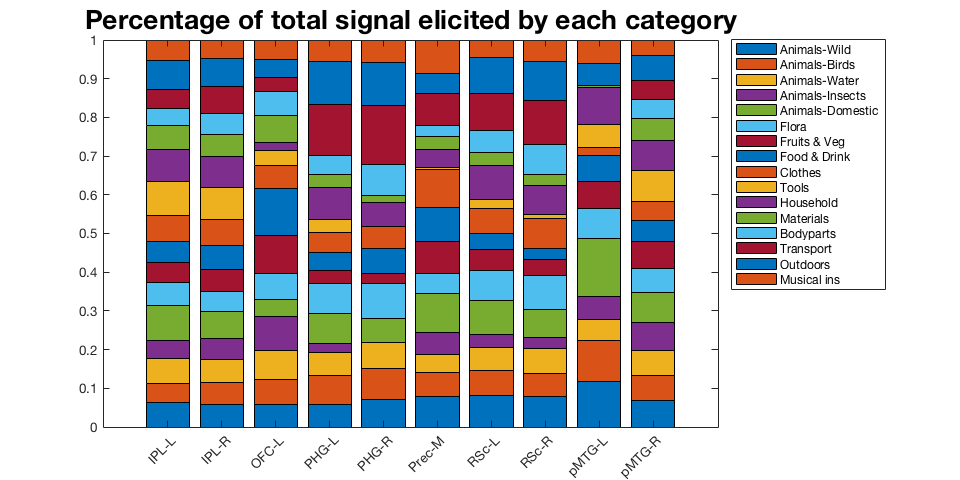

In [8]:
%plot --size 1000,500
inds = significant_inds;
%inds = 1:12;
mat = roi_data.mat(inds,:,:);
rlbls = roi_data.rlbls(inds);
tlbls = roi_data.tlbls;

m = mean(mat,3);
%m(m<0) = 0;
%m = abs(m);
for i = 1:size(m,1)
m(i,:) + min(m(i,:)); % add the minimum value
m(i,:) = m(i,:) ./ sum(m(i,:)); % divide by sum
end

H = bar(m,'stacked');
xticklabels(rlbls);xtickangle(45);
ylim([0 1])
l = legend(tlbls,'Location','bestoutside');
title('Percentage of total signal elicited by each category','fontsize',20)

## Semantic model
How do words cluster in the corpus

In [10]:
clear stim
load('/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/Scripts/Jwiki.mat'); %wiki
load('/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/Stimulation_script/winList_man3.mat'); %finale

wiki.nouns = strrep(wiki.nouns,'-n','');

finale.final_list(:,[5 18]) = [];
finale.catNames([5 18]) = [];
finale.catNames = {'Clothes' 'Musical ins' 'Tools' 'Household' 'Materials' 'Transport' 'Animals-Water' 'Animals-Insects' 'Animals-Domestic' 'Animals-Wild' 'Animals-Birds' 'Fruits & Veg' 'Food & Drink' 'Flora' 'Outdoors' 'Bodyparts'};
inds = ismember(wiki.nouns,finale.final_list(:));
disp('perc words found');disp(sum(inds) ./ length(finale.final_list(:)) * 100);
wiki.dm_avg = wiki.dm_avg(inds,:);
wiki.nouns = wiki.nouns(inds);

stim.list = finale.final_list;
stim.catNames = finale.catNames;

perc words found
   100



In [9]:
pwd


ans =

    '/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/Scripts'



In [11]:
tlbls = roi_data.tlbls;
ord = cellfun(@(x) find(strcmp(stim.catNames,x)),tlbls);
stim.catNames = stim.catNames(ord);
stim.list = stim.list(:,ord);

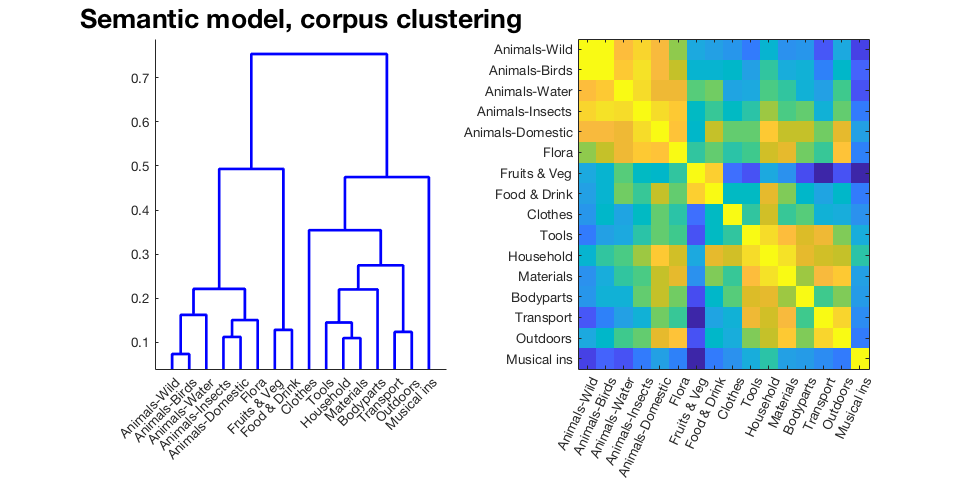

In [12]:
%plot --size 1000,500
wiki.dm_avg = log(wiki.dm_avg+1);

ncats = 16;
for c = 1:ncats
cat_inds = ismember(wiki.nouns,stim.list(:,c));
cat_vec = mean(wiki.dm_avg(cat_inds,:),1);
catDM(c,:) = cat_vec;
end

catRSM = corr(catDM');
catlbls = stim.catNames;


res = func_plot_dendMat(catRSM,catlbls);
subplot(1,2,1);
title('Semantic model, corpus clustering','fontsize',20)

model = catRSM;
model_lbls = catlbls;

### Clustering Results

ROI and task clustering. 

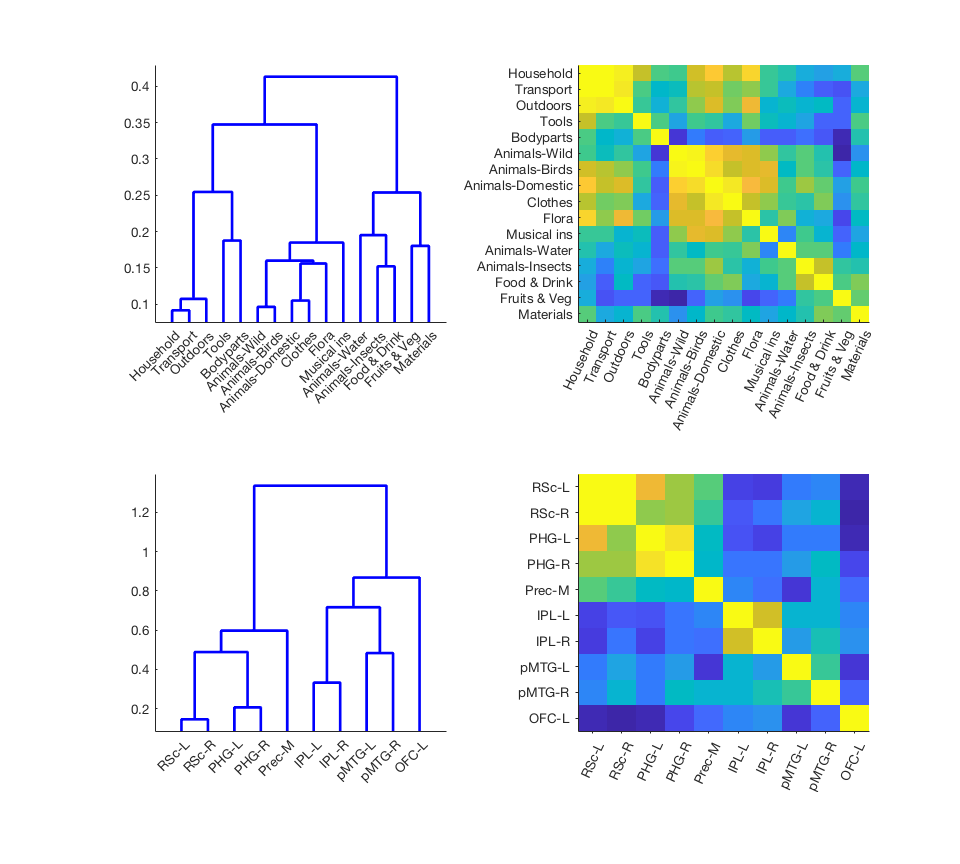

In [14]:
%plot inline --size 1000,900
%% NetRSA


r_inds = [significant_inds];
%mat = roi_data.mat;
mat = roi_data.mat(r_inds,:,:);

lbls = {roi_data.tlbls roi_data.rlbls(r_inds)};
f = figure(1);
clear tcmats rcmats
for s = 1:size(roi_data.mat,3)
tcmats(:,:,s) = corr(mat(:,:,s));
rcmats(:,:,s) = corr(mat(:,:,s)');
end
NetRSA_tcmats = tcmats;
NetRSA_rcmats = rcmats;
tcmat = mean(tcmats,3);
rcmat = mean(rcmats,3);

mats = {tcmat rcmat};

% Plot
res = func_plot_dendMat(mats,lbls);
f.CurrentAxes.TickDir = 'out';
subplot(2,2,2);box off;
subplot(2,2,4);box off;

## Model Fit

Overall Voxel Fit

In [ ]:
inds = 1:length(roi_data.rlbls);
wh_rois = voxel_data.mat_files(inds);
[cmat] = func_combroi(wh_rois,voxel_data);
data = cmat; 
model_fit = func_fit_RSA_model(data,model);
[H,P,CIb,STATS] = ttest(model_fit);
t_statement(STATS,P);

Individual ROI fit

In [ ]:
allCmats = [];
for inds = 1:length(voxel_data.mat_files);
wh_rois = voxel_data.mat_files(inds);
[cmat] = func_combroi(wh_rois,voxel_data);
allCmats(:,:,:,inds) = cmat;
data = cmat; 
model_fit = func_fit_RSA_model(data,model);
[H,P,CI,STATS] = ttest(model_fit);
end
%t_statement(STATS,P);

In [19]:
m_cmats = squeeze(mean(allCmats,3));

In [20]:
p = 0;
if p 
im_fn1 = '/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/results/BrainNet1.png';
im_fn2 = '/Users/aidasaglinskas/Google Drive/Aidas/Categories_Experiment/results/BrainNet2.png';
subplot(1,2,1)
imshow(imread(im_fn1))
subplot(1,2,2)
imshow(imread(im_fn2))
end

The network seems to be composed of a lateral and a medial component

In [21]:
tasks{1} = {'Animals-Water' 'Animals-Insects' 'Animals-Domestic' 'Animals-Wild' 'Animals-Birds' 'Fruits & Veg' 'Food & Drink' 'Flora'};
tasks{2} = {'Clothes' 'Musical ins' 'Tools' 'Household' 'Materials' 'Transport' 'Outdoors' 'Bodyparts'};
tasks_lbls{1} = 'Living';
tasks_lbls{2} = 'Non-Living';
    
%ROIs{1} =  {'RSc-L' 'RSc-R' 'PHG-L' 'PHG-R' 'Prec-M' 'vmPFC-M'}; % 
%ROIs{2} =  {'IPL-L' 'IPL-R' 'pMTG-L' 'pMTG-R' 'OFC-L' 'OFC-R'}; % 
%ROIs_lbls{1} = 'Medial';
%ROIs_lbls{2} = 'Lateral';

ROIs{1} =  {'VTC-L' 'VTC-R' 'AG-L' 'ATL-L' 'Prec-M' 'vmPFC-M' }; % 
ROIs{2} =  {'IFG-L' 'OFC-L' 'dmPFC-L' 'pMTG-L'}; % 
ROIs_lbls{1} = 'Semantic';
ROIs_lbls{2} = 'Control';

## Univariate Signal within subclusters
before we look for representation differences within the lateral and medial subsystemse, let's first take a look at their univariate response

In [22]:
rlbls = roi_data.rlbls;
tlbls = roi_data.tlbls;
mat = roi_data.mat;
for r = 1:length(ROIs)
for t = 1:length(ROIs)
r_inds = ismember(rlbls,ROIs{r});
t_inds = ismember(tlbls,tasks{t});

redmat(r,t,:) = mean(mean(mat(r_inds,t_inds,:),1),2);
end
end

m = mean(redmat,3);
sd = std(redmat,[],3);

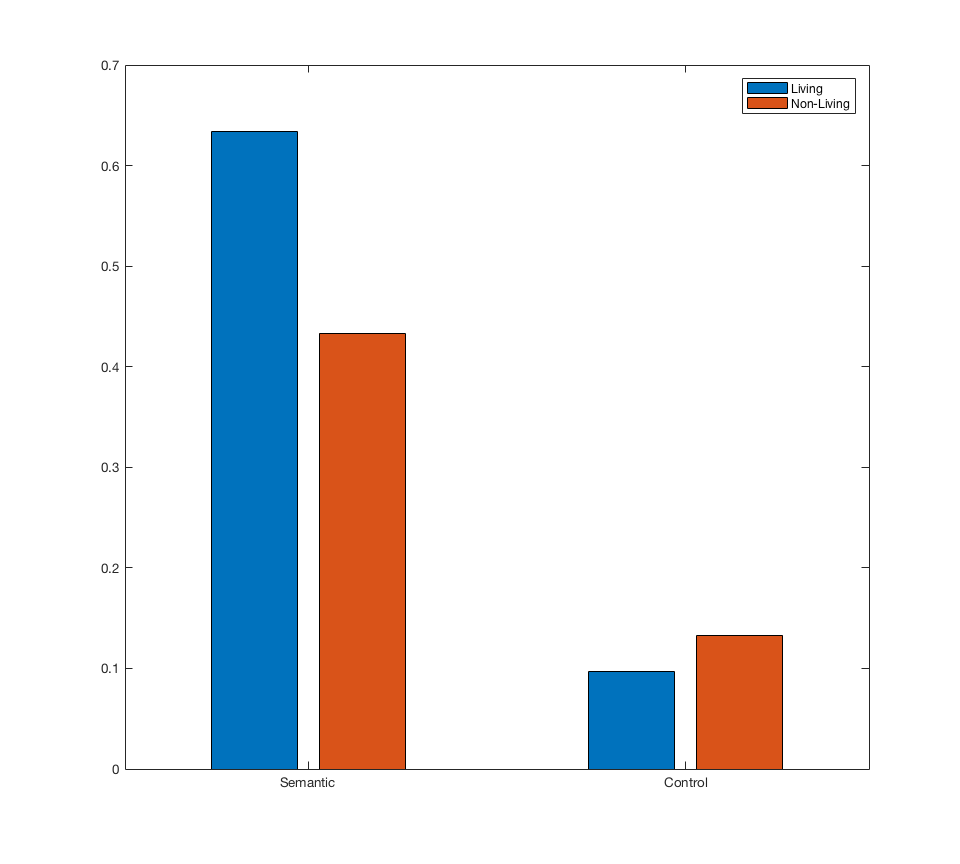

In [23]:
bar(m);
xticklabels(ROIs_lbls);
legend(tasks_lbls);

In [43]:
tlbls'
voxel_data.mat_files


ans =

  1x16 cell array

  Columns 1 through 3

    {'Animals-Wild'}    {'Animals-Birds'}    {'Animals-Water'}

  Columns 4 through 6

    {'Animals-Insects'}    {'Animals-Domestic'}    {'Flora'}

  Columns 7 through 10

    {'Fruits & Veg'}    {'Food & Drink'}    {'Clothes'}    {'Tools'}

  Columns 11 through 14

    {'Household'}    {'Materials'}    {'Bodyparts'}    {'Transport'}

  Columns 15 through 16

    {'Outdoors'}    {'Musical ins'}


ans =

  12x1 cell array

    {'IPL-L'  }
    {'IPL-R'  }
    {'OFC-L'  }
    {'OFC-R'  }
    {'PHG-L'  }
    {'PHG-R'  }
    {'Prec-M' }
    {'RSc-L'  }
    {'RSc-R'  }
    {'pMTG-L' }
    {'pMTG-R' }
    {'vmPFC-M'}



In [44]:
wh_roi = 'pMTG-L';
wh_tasks = {'Animals-Birds' 'Animals-Wild' 'Food & Drink' 'Fruits & Veg' 'Tools' 'Clothes'};
tind = find(ismember(tlbls,wh_tasks));
rind = find(strcmp(voxel_data.mat_files,wh_roi));

use_data = voxel_data;
use_data.dt = use_data.dt(:,tind,:);
use_data.tlbls = use_data.tlbls(tind);

cmat = func_combroi({wh_roi},use_data);

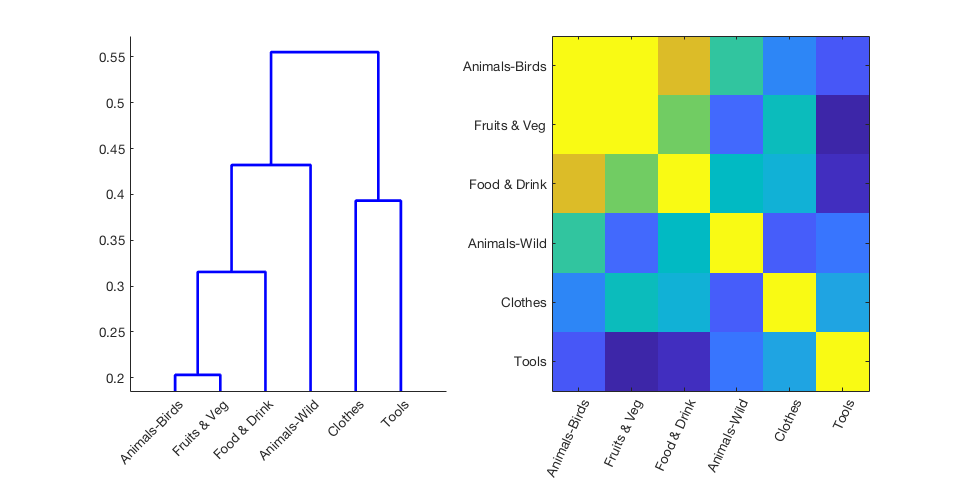

In [45]:
%plot --size 1000,500
func_plot_dendMat(mean(cmat,3),use_data.tlbls);